# Python Intermedio - Práctica 2

![logo](https://www.belatrix.com/wp-content/uploads/2023/08/belatrix-logosweb-1.png)

## Recortar una imagen y cambiar su tamaño

In [118]:
# pip install pillow
from PIL import (
    Image,
    ImageDraw,
    ImageFilter
)
import requests
from io import BytesIO

### Obtener la imagen

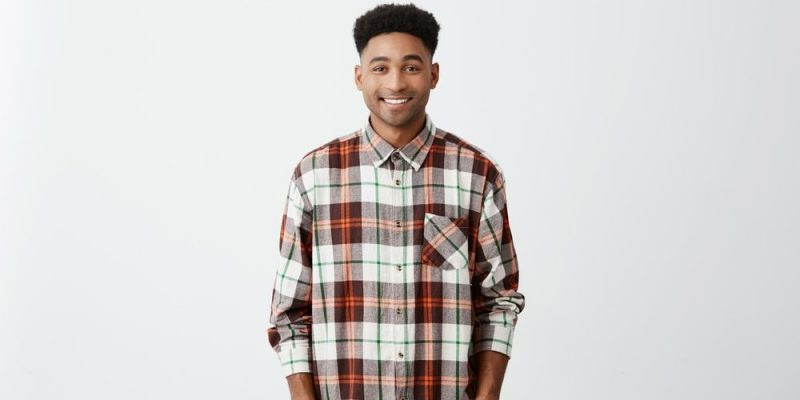

In [120]:
# image = Image.open("cliente.jpg")

url = "https://concepto.de/wp-content/uploads/2018/08/persona-e1533759204552.jpg"

image = Image.open(BytesIO(requests.get(url).content))
image

In [121]:
image.size

(800, 400)

In [122]:
w, h = image.size
w, h

(800, 400)

### Conversiones

* `RGB` - Imagen en RED / GREEN / BLUE
* `RGBA` - Imagen con transparencia en RED / GREEN / BLUE / ALPHA
* `L` - Imagen en escala de grises

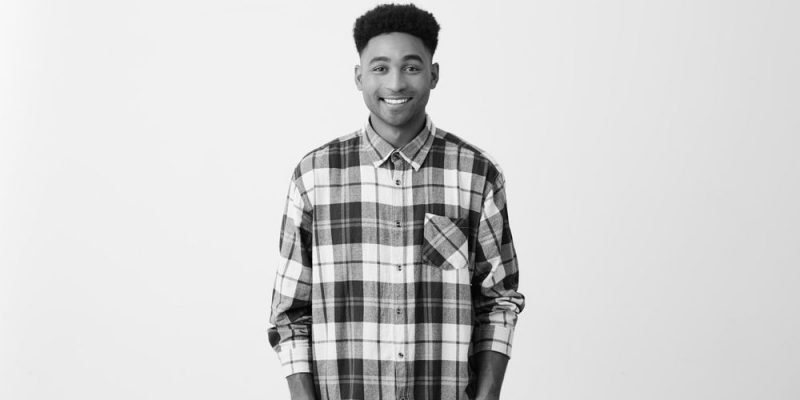

In [123]:
image.convert("L")

### Dibujar un marco

* `rectangle([(<x1>, <y1>), (<x2>, <y2>)], outline=<color>, width=<ancho>)`
* `ellipse([<x1>, <y1>, (<x2>, <y2>)], outline=<color>, width=<ancho>)`

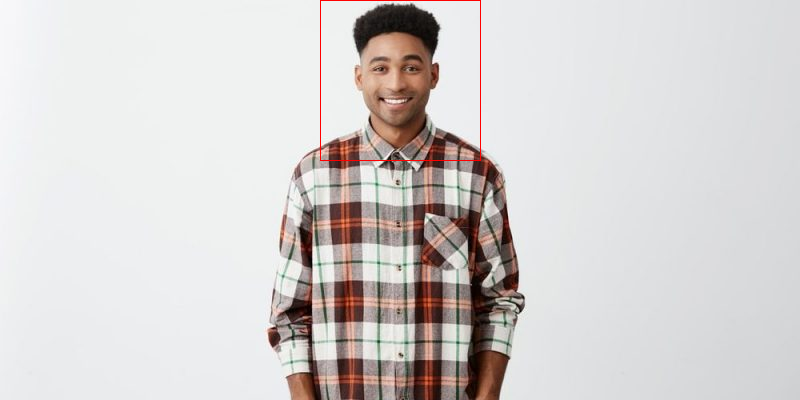

In [127]:
image2 = image.convert("RGBA")

draw = ImageDraw.Draw(image2)

box = [(.4 * w, 0), (.6 * w, .4 * h)]

draw.rectangle(box, outline="red", width=1)

image2

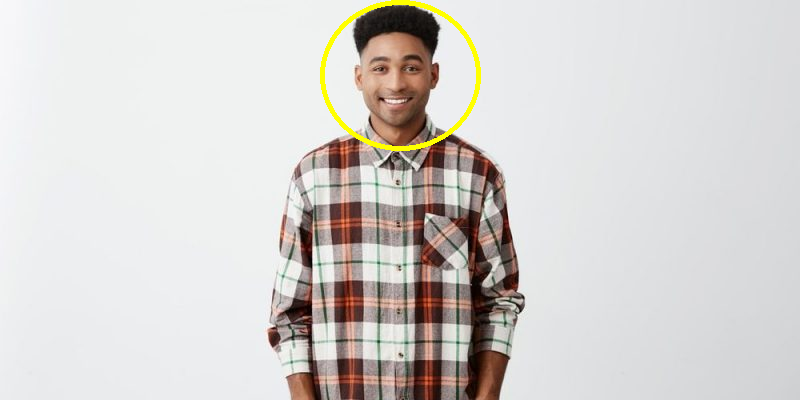

In [131]:
image3 = image.convert("RGBA")

draw = ImageDraw.Draw(image3)

ellipse = [(320, 0), (480, 150)]

draw.ellipse(ellipse, outline="yellow", width=5)

image3

### Recortar una imagen rectangular

`.crop((<x1>, <y1>, <x2>, <y2>))`

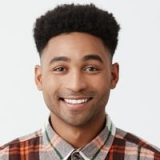

In [44]:
region = (.4 * w, 0, .6 * w, .4 * h)

image3 = image.crop(region)

image3

### Recortar una imagen circular

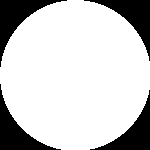

In [135]:
radio = 75
x, y = 400, 75

mask = Image.new("L", (2 * radio, 2 * radio), 0)
draw = ImageDraw.Draw(mask)
draw.ellipse((0, 0, 2 * radio, 2 * radio), fill=255)

mask

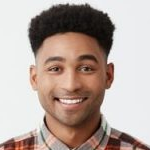

In [149]:
image4 = image.convert("RGBA").crop((x - radio, y - radio, x + radio, y + radio))
image4

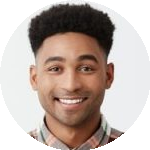

In [150]:
image5 = Image.new("RGBA", (2 * radio, 2 * radio))
image5.paste(image4, (0, 0), mask)
image5

## Redimensionar la imagen

Métodos de redimensionado

* `Image.NEAREST` - Vecino más cercano (simple / más rápido)
* `Image.BILINEAR` - Interpolación bilineal (aceptable)
* `Image.BICUBIC` - Interpolación bicúbica (mejor)
* `Image.LANCZOS` - Antialias (más nítido / más lento)

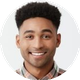

In [151]:
image6 = image5.resize((80, 80), Image.LANCZOS)
image6

## Filtros

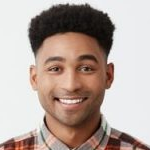

In [99]:
image4

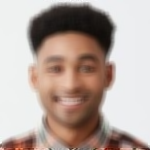

In [95]:
image4.filter(ImageFilter.BLUR)

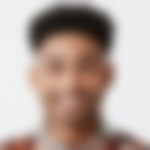

In [148]:
image4.filter(ImageFilter.GaussianBlur(radius=5))

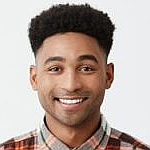

In [98]:
image4.filter(ImageFilter.SHARPEN)

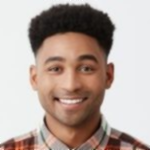

In [100]:
image4.filter(ImageFilter.SMOOTH)

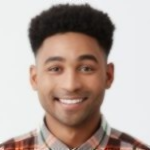

In [101]:
image4.filter(ImageFilter.SMOOTH_MORE)

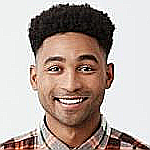

In [102]:
image4.filter(ImageFilter.EDGE_ENHANCE)

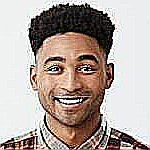

In [103]:
image4.filter(ImageFilter.EDGE_ENHANCE_MORE)

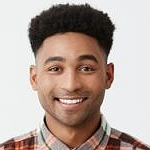

In [104]:
image4.filter(ImageFilter.DETAIL)

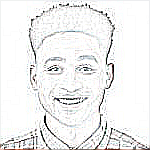

In [105]:
image4.filter(ImageFilter.CONTOUR)

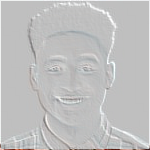

In [106]:
image4.filter(ImageFilter.EMBOSS)

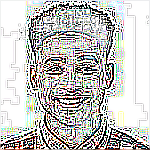

In [113]:
image4.filter(ImageFilter.EDGE_ENHANCE_MORE).filter(ImageFilter.DETAIL).filter(ImageFilter.CONTOUR)

### Guardar la imagen

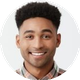

In [116]:
image6

In [152]:
image6.save("cliente_thumb.png")